## 矩阵分解算法

### 1. 背景介绍

矩阵分解（Matrix Factorization, MF）是一种广泛应用于推荐系统的技术。它的核心思想是将用户-物品交互矩阵分解为两个低秩矩阵，分别表示用户的隐向量和物品的隐向量。通过这种方式，可以有效地捕捉用户和物品之间的潜在关系，并用于预测用户对未评分物品的兴趣。

典型的应用场景包括：
- 电影推荐（如 MovieLens 数据集）。
- 商品推荐（如电商网站）。
- 音乐或文章推荐。

### 2. 数学模型

假设我们有一个用户-物品评分矩阵 $ R \in \mathbb{R}^{m \times n} $，其中：
- $ m $ 是用户数量。
- $ n $ 是物品数量。
- $ R_{ij} $ 表示用户 $ i $ 对物品 $ j $ 的评分（如果用户没有评分，则 $ R_{ij} $ 为空）。

矩阵分解的目标是将 $ R $ 分解为两个低秩矩阵：
$$
R \approx P \cdot Q^T
$$
其中：
- $ P \in \mathbb{R}^{m \times k} $：用户隐向量矩阵，每一行表示一个用户的隐向量。
- $ Q \in \mathbb{R}^{n \times k} $：物品隐向量矩阵，每一行表示一个物品的隐向量。
- $ k $：隐空间的维度（超参数，通常远小于 $ m $ 和 $ n $）。

通过这种分解，用户 $ i $ 对物品 $ j $ 的评分可以预测为：
$$
\hat{R}_{ij} = P_i \cdot Q_j^T = \sum_{f=1}^k P_{if} Q_{jf}
$$
其中：
- $ P_i $ 是用户 $ i $ 的隐向量。
- $ Q_j $ 是物品 $ j $ 的隐向量。

### 3. 损失函数

为了优化矩阵分解模型，我们需要定义一个损失函数来衡量预测值与真实值之间的差距。常用的损失函数是均方误差（Mean Squared Error, MSE）：
$$
L = \frac{1}{2} \sum_{(i,j) \in \Omega} (R_{ij} - \hat{R}_{ij})^2 + \frac{\lambda}{2} (\|P\|^2 + \|Q\|^2)
$$
其中：
- $ \Omega $：训练集中所有已知评分的索引集合。
- $ \hat{R}_{ij} = P_i \cdot Q_j^T $：用户 $ i $ 对物品 $ j $ 的预测评分。
- $ \lambda $：正则化系数，用于防止过拟合。
- $ \|P\|^2 $ 和 $ \|Q\|^2 $：分别是用户隐向量矩阵和物品隐向量矩阵的 L2 正则化项。

目标是最小化损失函数 $ L $。

### 4. 优化方法

矩阵分解通常使用梯度下降法进行优化。以下是具体的推导过程：

#### （1）梯度计算

损失函数 $ L $ 对 $ P_{if} $ 和 $ Q_{jf} $ 的偏导数分别为：
$$
\frac{\partial L}{\partial P_{if}} = - \sum_{j \in \Omega(i)} (R_{ij} - \hat{R}_{ij}) Q_{jf} + \lambda P_{if}
$$
$$
\frac{\partial L}{\partial Q_{jf}} = - \sum_{i \in \Omega(j)} (R_{ij} - \hat{R}_{ij}) P_{if} + \lambda Q_{jf}
$$
其中：
- $ \Omega(i) $：用户 $ i $ 已评分的物品集合。
- $ \Omega(j) $：物品 $ j $ 已被评分的用户集合。

#### （2）参数更新

根据梯度下降法，参数更新公式为：
$$
P_{if} \leftarrow P_{if} - \eta \frac{\partial L}{\partial P_{if}}
$$
$$
Q_{jf} \leftarrow Q_{jf} - \eta \frac{\partial L}{\partial Q_{jf}}
$$
其中：
- $ \eta $：学习率，控制每次更新的步长。

具体实现时，可以逐样本或批量更新参数。

### 5. 算法流程

以下是矩阵分解算法的完整流程：

1. **初始化**：
   - 随机初始化用户隐向量矩阵 $ P $ 和物品隐向量矩阵 $ Q $。

2. **迭代训练**：
   - 对于每一轮训练：
     - 遍历所有已知评分 $ (i, j, R_{ij}) $：
       - 计算预测值：$ \hat{R}_{ij} = P_i \cdot Q_j^T $。
       - 计算误差：$ e_{ij} = R_{ij} - \hat{R}_{ij} $。
       - 更新参数：
         $$
         P_{if} \leftarrow P_{if} + \eta (e_{ij} Q_{jf} - \lambda P_{if})
         $$
         $$
         Q_{jf} \leftarrow Q_{jf} + \eta (e_{ij} P_{if} - \lambda Q_{jf})
         $$

3. **评估模型**：
   - 在测试集上计算预测评分，并评估指标（如 RMSE 或 MAE）。

4. **终止条件**：
   - 达到最大迭代次数或损失函数收敛。

### 6. 总结

矩阵分解是一种强大的推荐算法，具有以下优点：
- **表达能力强**：通过隐向量捕捉用户和物品的潜在特征。
- **可扩展性好**：适用于大规模稀疏数据。
- **灵活性高**：可以通过添加正则化项或引入额外信息（如用户特征、物品特征）进行改进。

然而，它也有一些局限性：
- **冷启动问题**：对于新用户或新物品，缺乏足够的历史数据进行建模。
- **无法处理复杂关系**：仅基于用户-物品交互，可能忽略上下文信息。

通过结合深度学习或其他技术，矩阵分解可以进一步提升性能，成为现代推荐系统的重要基础。

---

再算法实现之前我们介绍一个函数 `user_cnt=np.bincount(train[:,0],minlength=user_num)`: 主要用于统计非负整数数组中每个值的出现次数

train[:,0]：要遍历的数组

minlength=user_num:确保返回数组的长度至少为 

我们看一个示例

In [5]:
import numpy as np

arr = np.array([0, 1, 1, 3, 2, 1, 7])
counts = np.bincount(arr)
print(counts)

[1 3 1 1 0 0 0 1]


接下来我们来读取一下文件参数


我们来介绍一下文件里面的参数

- 用户编号
- 电影的编号
- 该用户对该电影的评分

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

data=np.loadtxt('movielens_100k.csv',delimiter=',',dtype=int)
print("数据大小： ",len(data))

#用户和电影都是从1开始编号的，我们将其转换为从0开始
data[:,:2]=data[:,:2]-1

#计算用户和电影的数量
users=set()  #集合,唯一性
items=set()
for i,j,k in data:
  users.add(i)
  items.add(j)
user_num=len(users)
item_num=len(items)
print(f'用户数：{user_num},电影数:{item_num}')

#随机种子
np.random.seed(0)

#分割数据集
ratio=0.8
split=int(ratio*len(data))
#随机打乱数组          这里不沿用之前的 `np.random.permutation` 是因为之前 x y都需要打乱，而且需要以一一对应
np.random.shuffle(data)
train=data[:split]
test=data[split:]

#统计训练集每个用户和电影的出现的数量，作为正则化的权重
user_cnt=np.bincount(train[:,0],minlength=user_num)
item_cnt=np.bincount(train[:,1],minlength=item_num)
print(user_cnt[:10])
print(item_cnt[:10])

#用户和电影的编号要作为下标，必须保存为整数
user_train,user_test=train[:,0],test[:,0]
item_train,item_test=train[:,1],test[:,1]
y_train,y_test=train[:,2],test[:,2]


数据大小：  100000
用户数：943,电影数:1682
[215  47  42  19 139 170 320  47  18 156]
[371 109  70 172  70  21 308 158 240  68]


In [17]:
class MF:

  def __init__(self,N,M,d):
    #N表示用户的数量，M是电影的数量，d是特征维度
    #定义模型参数
    self.user_params=np.ones((N,d))
    self.item_params=np.ones((M,d))
  def pred(self,user_id,item_id):
    #预测用户user_id对电影item_id的打分
    #获得用户偏好和电影特征
    user_param=self.user_params[user_id]
    item_param=self.item_params[item_id]
    #返回预测的评分
    rating_pred=np.sum(user_param*item_param,axis=1)
    return rating_pred
  def update(self,user_grad,item_grad,lr):
    #根据参数的梯度更新参数
    self.user_params-=lr*user_grad
    self.item_params-=lr*item_grad    

- 首先我们来介绍一个可视化工具

` with tqdm(range(max_training_step * batch_num)) as pbar:`

它是一个进度条工具，用于可视化训练进度。range(max_training_step * batch_num) 表示总的批量数量。

as pbar 将这个迭代器绑定到变量 pbar

- 函数1

`np.ceil()`

用于对输入的数值或数组中的每个元素向上取整

- 函数2

 `zip(user_batch, item_batch, errs)`  

 用于将多个可迭代对象（如列表、数组等）按顺序“打包”成一个个元组。它的作用是让多个可迭代对象可以同时被遍历

 我们来看个例子

In [20]:
users = [0, 1, 2]
items = [4, 3, 7]
errs = [0.1, -0.2, 0.3]

for user, item, err in zip(users, items, errs):
    print(user, item, err)

0 4 0.1
1 3 -0.2
2 7 0.3


我们来介绍一下下面训练模型的参数：

model：推荐系统模型对象，包含用户和物品的参数矩阵 P 和 Q，以及相关方法如 pred() 和 update()。

learning_rate: 学习率

lbd：正则化系数，用于防止过拟合

max_training_step：最大训练轮次（epoch 数量）

batch_size：每个批量的大小，用于划分训练数据。



In [ ]:
def train(model, learning_rate, lbd, max_training_step, batch_size):
    train_losses = []
    test_losses = []
    #划分批次
    batch_num = int(np.ceil(len(user_train) / batch_size))
    with tqdm(range(max_training_step * batch_num)) as pbar:
        for epoch in range(max_training_step):
            # 随机梯度下降
            train_rmse = 0
            for i in range(batch_num):
                # 获取当前批量
                st = i * batch_size
                ed = min(len(user_train), st + batch_size)
                user_batch = user_train[st: ed]
                item_batch = item_train[st: ed]
                y_batch = y_train[st: ed]

                # 计算模型预测
                y_pred = model.pred(user_batch, item_batch)
                
                # 计算梯度
                P = model.user_params
                Q = model.item_params
                errs = y_batch - y_pred
                P_grad = np.zeros_like(P)
                Q_grad = np.zeros_like(Q)
                for user, item, err in zip(user_batch, item_batch, errs):
                    P_grad[user] = P_grad[user] - err * Q[item] + lbd * P[user]
                    Q_grad[item] = Q_grad[item] - err * P[user] + lbd * Q[item]
                model.update(P_grad / len(user_batch), Q_grad / len(user_batch), learning_rate)
                
                train_rmse += np.mean(errs ** 2)
                # 更新进度条
                pbar.set_postfix({
                    'Epoch': epoch,
                    'Train RMSE': f'{np.sqrt(train_rmse / (i + 1)):.4f}',
                    'Test RMSE': f'{test_losses[-1]:.4f}' if test_losses else None
                })
                pbar.update(1)

            # 计算 RMSE 损失
            train_rmse = np.sqrt(train_rmse / len(user_train))
            train_losses.append(train_rmse)
            y_test_pred = model.pred(user_test, item_test)
            test_rmse = np.sqrt(np.mean((y_test - y_test_pred) ** 2))
            test_losses.append(test_rmse)
    
    return train_losses, test_losses

#### 学习思考
为什么梯度下降要对PQ求偏导,帮我用markdown模式给出解释文件？

在矩阵分解（Matrix Factorization, MF）中，梯度下降法被用来优化用户隐向量矩阵 $P$ 和物品隐向量矩阵 $Q$。为了实现这一点，我们需要对 $P$ 和 $Q$ 求偏导数。以下是对这一问题的详细解释。

---

在矩阵分解中，用户隐向量矩阵 $P$ 和物品隐向量矩阵 $Q$ 是模型的可训练参数。我们的目标是通过调整这些参数来最小化损失函数 $L$。因此，需要计算 $L$ 对 $P$ 和 $Q$ 的偏导数，以确定它们应该如何更新。

##### （1）损失函数的形式

矩阵分解的目标是最小化以下损失函数：
$$
L = \frac{1}{2} \sum_{(i,j) \in \Omega} (R_{ij} - \hat{R}_{ij})^2 + \frac{\lambda}{2} (\|P\|^2 + \|Q\|^2)
$$
其中：
- $R_{ij}$ 是真实评分。
- $\hat{R}_{ij} = P_i \cdot Q_j^T = \sum_{f=1}^k P_{if} Q_{jf}$ 是预测评分。
- 第一项是预测误差的平方和。
- 第二项是正则化项，防止过拟合。

为了最小化 $L$，我们需要知道 $L$ 如何随 $P_{if}$ 和 $Q_{jf}$ 的变化而变化，这正是通过求偏导数完成的。

##### （2）偏导数的意义

- 偏导数 $\frac{\partial L}{\partial P_{if}}$ 表示损失函数 $L$ 在 $P_{if}$ 方向上的变化率。
- 偏导数 $\frac{\partial L}{\partial Q_{jf}}$ 表示损失函数 $L$ 在 $Q_{jf}$ 方向上的变化率。

通过计算这些偏导数，我们可以知道每个参数对损失函数的影响，并据此调整参数值。

---

#### 1. 偏导数的推导过程

##### （1）预测误差部分

预测误差为：
$$
e_{ij} = R_{ij} - \hat{R}_{ij} = R_{ij} - \sum_{f=1}^k P_{if} Q_{jf}
$$

损失函数的第一项对 $P_{if}$ 的偏导数为：
$$
\frac{\partial L}{\partial P_{if}} = - \sum_{j \in \Omega(i)} e_{ij} Q_{jf}
$$
其中：
- $e_{ij} = R_{ij} - \hat{R}_{ij}$ 是误差。
- $Q_{jf}$ 是物品 $j$ 的隐向量分量。

类似地，对 $Q_{jf}$ 的偏导数为：
$$
\frac{\partial L}{\partial Q_{jf}} = - \sum_{i \in \Omega(j)} e_{ij} P_{if}
$$

##### （2）正则化项部分

正则化项为：
$$
\frac{\lambda}{2} (\|P\|^2 + \|Q\|^2) = \frac{\lambda}{2} \left( \sum_{i,f} P_{if}^2 + \sum_{j,f} Q_{jf}^2 \right)
$$

对 $P_{if}$ 的偏导数为：
$$
\frac{\partial}{\partial P_{if}} \left( \frac{\lambda}{2} \|P\|^2 \right) = \lambda P_{if}
$$

对 $Q_{jf}$ 的偏导数为：
$$
\frac{\partial}{\partial Q_{jf}} \left( \frac{\lambda}{2} \|Q\|^2 \right) = \lambda Q_{jf}
$$

##### （3）总偏导数

将两部分合并，得到总偏导数：
$$
\frac{\partial L}{\partial P_{if}} = - \sum_{j \in \Omega(i)} e_{ij} Q_{jf} + \lambda P_{if}
$$
$$
\frac{\partial L}{\partial Q_{jf}} = - \sum_{i \in \Omega(j)} e_{ij} P_{if} + \lambda Q_{jf}
$$

---

100%|██████████| 37500/37500 [00:48<00:00, 773.93it/s, Epoch=29, Train RMSE=0.9673, Test RMSE=1.0048]


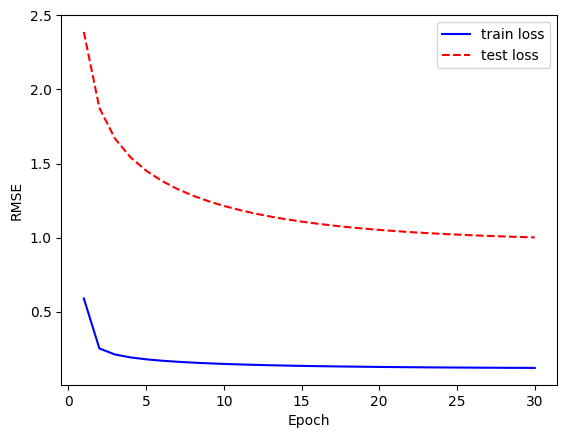

In [19]:
# 超参数
feature_num = 16 # 特征数
learning_rate = 0.1 # 学习率
lbd = 1e-4 # 正则化强度
max_training_step = 30
batch_size = 64 # 批量大小

# 建立模型
model = MF(user_num, item_num, feature_num)
# 训练部分
train_losses, test_losses = train(model, learning_rate, lbd, 
    max_training_step, batch_size)

plt.figure()
x = np.arange(max_training_step) + 1
plt.plot(x, train_losses, color='blue', label='train loss')
plt.plot(x, test_losses, color='red', ls='--', label='test loss')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.legend()
plt.show()

我们来看下预测的结果和真实值的比较

In [21]:
y_test_pred = model.pred(user_test, item_test)
print(y_test_pred[:10]) # 把张量转换为numpy数组
print(y_test[:10])

[2.57712395 3.48622005 3.76150216 3.58604004 4.8058418  3.47284112
 3.37246031 4.0917956  3.02605747 3.45742155]
[2 4 4 4 5 2 3 1 4 4]
